In [1]:
import skimage.io as skio
import skimage
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
import numpy as np
from filters import *
from tools import *
from sklearn.model_selection import train_test_split
import random

In [2]:
DATASET = ['Fluo-N2DL-HeLa','PhC-C2DH-U373']
idx = 0

IM_PATH = sorted(glob.glob(f'data/{DATASET[idx]}/IMG_TRAIN/*.tif'))
TG_PATH = sorted(glob.glob(f'data/{DATASET[idx]}/TARGET_TRAIN/*.tif'))

In [3]:
X_train, y_train = load_img_tg(IM_PATH, TG_PATH)

Best threshold : 0.06, score : 0.81


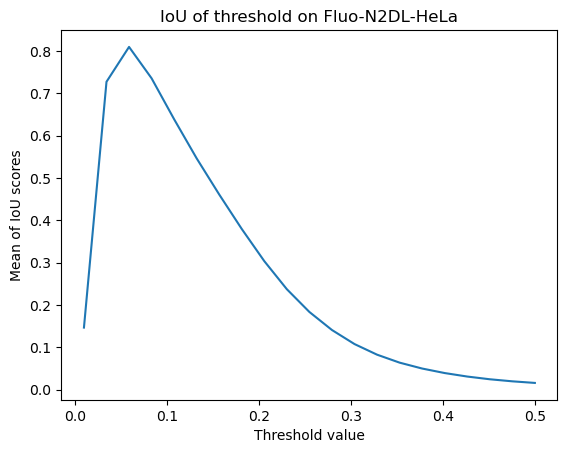

In [5]:
scores = []
threshold = np.linspace(0.01,0.5,21)
for thresh in threshold:
    temp_score = []
    for im,target in zip(X_train,y_train):
        seg = thresholding(im,thresh)
        temp_score.append(jaccard_score(target,seg,average='micro'))
    scores.append(np.mean(temp_score))
plt.plot(threshold,scores)
plt.title(f'IoU of threshold on {DATASET[idx]}')
plt.xlabel('Threshold value')
plt.ylabel('Mean of IoU scores')
idx_best_thresh = np.argmax(scores)
best_thresh = threshold[idx_best_thresh]
print(f'Best threshold : {best_thresh:.2f}, score : {scores[idx_best_thresh]:.2f}')

In [7]:
IM_TEST_PATH = sorted(glob.glob(f'data/{DATASET[idx]}/IMG_TEST/*.tif'))
TG_TEST_PATH = sorted(glob.glob(f'data/{DATASET[idx]}/TARGET_TEST/*.tif'))

X_test, y_test = load_img_tg(IM_TEST_PATH, TG_TEST_PATH)

Text(0, 0.5, 'Frequency')

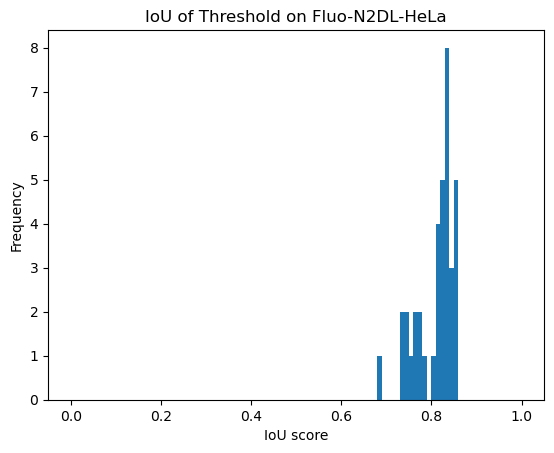

In [8]:
results = []
manual_thresh = best_thresh
for im,target in zip(X_test,y_test):
    seg = thresholding(im,manual_thresh)
    results.append(jaccard_score(target,seg,average='micro'))
plt.hist(results,bins=100,range=(0,1))
plt.title(f'IoU of Threshold on {DATASET[idx]}')
plt.xlabel('IoU score')
plt.ylabel('Frequency')

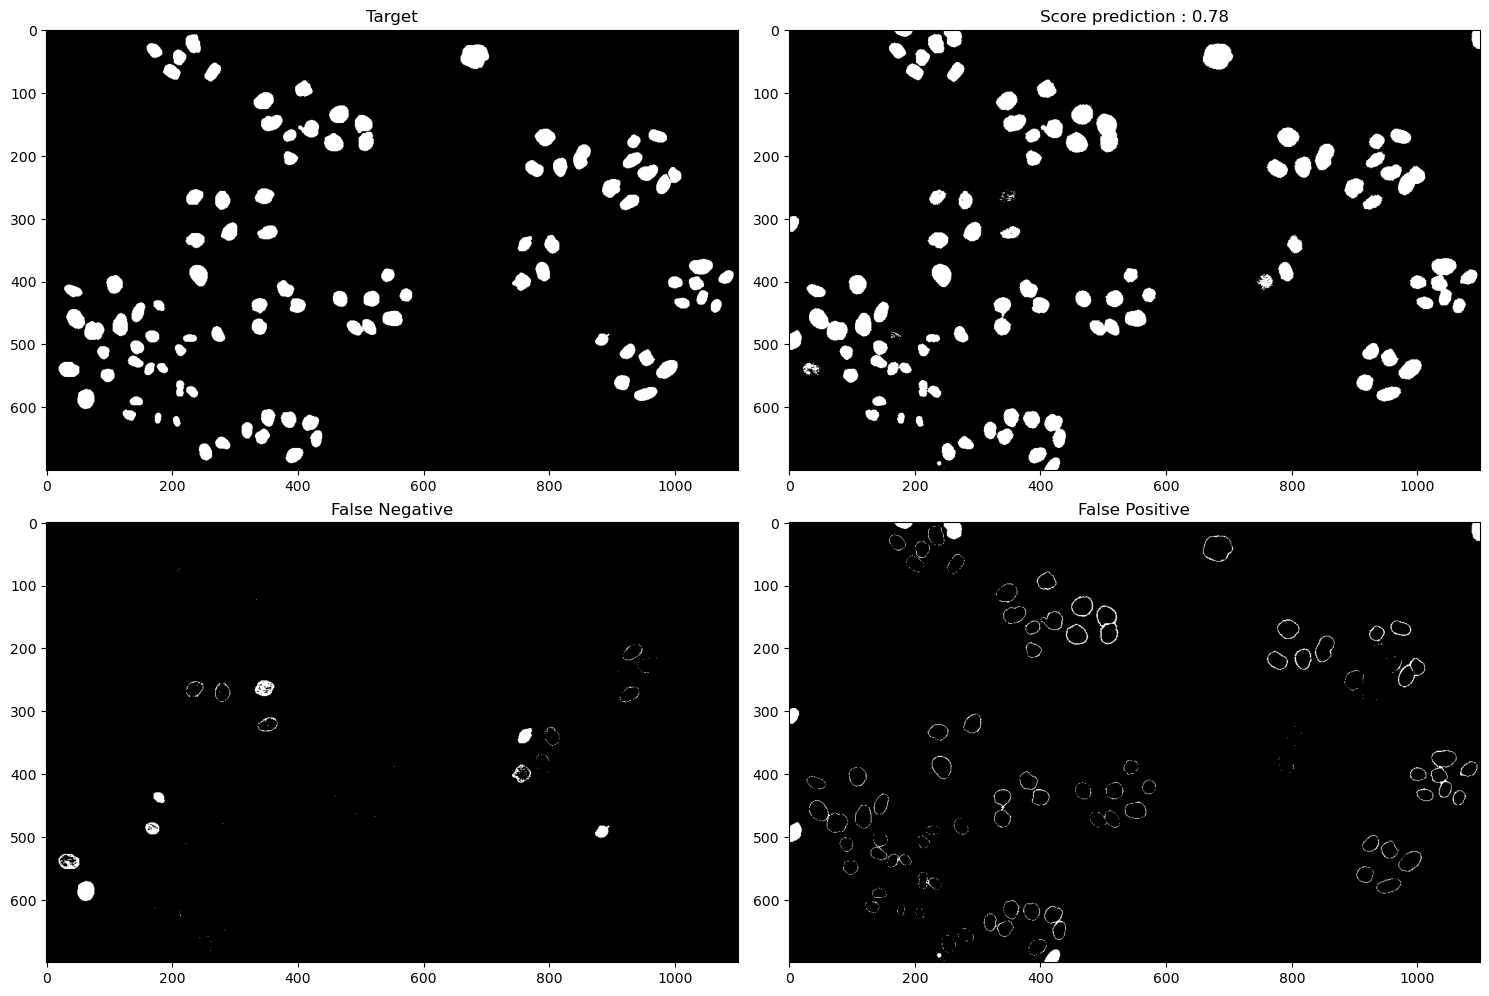

In [9]:
n_im = random.randrange(len(y_test))
target = y_test[n_im]
seg = thresholding(X_test[n_im],best_thresh)
score = jaccard_score(target,seg,average='micro')

plot_pred_with_target(target,seg,score)